In [145]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('df_final.csv', index_col=0)
data_2013 = pd.read_csv('df_final_2013.csv', index_col = 0)

## Create dataset.

In [4]:
data.columns

Index(['UNIQUE_ID', 'BEGIN_YEARMONTH', 'DAY', 'END_YEARMONTH', 'END_DAY',
       'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME',
       'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'INJURIES_DIRECT',
       'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'FIPS',
       'LatLng', 'State', 'County', '% Severe Housing Problems',
       '% Non-Hispanic White', '% Minority', '% Rural', 'GeoName', '2014',
       'Disaster Type', 'DURATION', 'coop_id', 'MONTH', 'MONTH_DAY_x', 'PRCP',
       'SNOW', 'SNWD', 'TMAX', 'TMIN', 'MONTH_DAY_y', 'AVG_TEMP', 'AVG_PRCP',
       'AVG_SNOW', 'AVG_TEMP_EVENT', 'TOTAL_PRCP', 'TOTAL_SNOW'],
      dtype='object')

In [5]:
data_2013.columns

Index(['UNIQUE_ID', 'BEGIN_YEARMONTH', 'DAY', 'END_YEARMONTH', 'END_DAY',
       'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME',
       'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'INJURIES_DIRECT',
       'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'FIPS',
       'LatLng', 'State', 'County', '% Severe Housing Problems',
       '% Non-Hispanic White', '% Minority', '% Rural', 'GeoName', '2013',
       'Disaster Type', 'DURATION', 'coop_id', 'MONTH', 'PRCP', 'SNOW', 'SNWD',
       'TMAX', 'TMIN', 'AVG_TEMP', 'AVG_PRCP', 'AVG_SNOW', 'AVG_TEMP_EVENT',
       'TOTAL_PRCP', 'TOTAL_SNOW'],
      dtype='object')

In [6]:
data.rename(columns = {'2014': 'PERCAPITA_INCOME'}, inplace = True)
data_2013.rename(columns = {'2013': 'PERCAPITA_INCOME'}, inplace = True)

In [284]:
data_concat = pd.concat(objs = [data, data_2013], ignore_index = True)

In [8]:
data_dummies = pd.get_dummies(data_concat, columns = ['EVENT_TYPE'])

In [9]:
data_dummies.columns

Index(['% Minority', '% Non-Hispanic White', '% Rural',
       '% Severe Housing Problems', 'AVG_PRCP', 'AVG_SNOW', 'AVG_TEMP',
       'AVG_TEMP_EVENT', 'BEGIN_YEARMONTH', 'CZ_FIPS', 'CZ_NAME', 'CZ_TYPE',
       'County', 'DAY', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DURATION',
       'Disaster Type', 'END_DAY', 'END_YEARMONTH', 'EPISODE_ID', 'EVENT_ID',
       'FIPS', 'GeoName', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'LatLng',
       'MONTH', 'MONTH_DAY_x', 'MONTH_DAY_y', 'MONTH_NAME', 'PERCAPITA_INCOME',
       'PRCP', 'SNOW', 'SNWD', 'STATE', 'STATE_FIPS', 'State', 'TMAX', 'TMIN',
       'TOTAL_PRCP', 'TOTAL_SNOW', 'UNIQUE_ID', 'YEAR', 'coop_id',
       'EVENT_TYPE_Debris Flow', 'EVENT_TYPE_Dense Fog', 'EVENT_TYPE_Drought',
       'EVENT_TYPE_Dust Devil', 'EVENT_TYPE_Flash Flood', 'EVENT_TYPE_Flood',
       'EVENT_TYPE_Funnel Cloud', 'EVENT_TYPE_Hail', 'EVENT_TYPE_Heavy Rain',
       'EVENT_TYPE_High Wind', 'EVENT_TYPE_Lightning',
       'EVENT_TYPE_Thunderstorm Wind', 'EVENT_TYPE_To

In [10]:
data_dummies.loc[data_dummies['Disaster Type'].notnull(), 'Disaster Type'] = 1
data_dummies.loc[data_dummies['Disaster Type'].isnull(), 'Disaster Type'] = 0
data_dummies.rename(columns = {'Disaster Type': 'FEMA_DECLARED'}, inplace = True)

In [11]:
len(data_dummies)

51770

In [266]:
data_check = data_dummies.drop_duplicates(subset = ['FIPS', 'EPISODE_ID', 'FEMA_DECLARED'])

In [185]:
len(data_check)

25965

In [14]:
len(data_check[data_check['FEMA_DECLARED'] == 1])

561

In [285]:
data_concat.loc[data_concat['Disaster Type'].notnull(), 'Disaster Type'] = 1
data_concat.loc[data_concat['Disaster Type'].isnull(), 'Disaster Type'] = 0
data_concat.rename(columns = {'Disaster Type': 'FEMA_DECLARED'}, inplace = True)
data_concat = data_concat.drop_duplicates(subset = ['FIPS', 'EPISODE_ID', 'FEMA_DECLARED'])

In [286]:
data_concat['FEMA_DECLARED'].describe()

count     25965
unique        2
top           0
freq      25404
Name: FEMA_DECLARED, dtype: int64

## Explore dataset.

In [15]:
data_check.fillna(0, inplace=True)

/Users/meghajain/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [16]:
data_check.groupby(by = ['FEMA_DECLARED']).count()

,% Minority,% Non-Hispanic White,% Rural,% Severe Housing Problems,AVG_PRCP,AVG_SNOW,AVG_TEMP,AVG_TEMP_EVENT,BEGIN_YEARMONTH,CZ_FIPS,...,EVENT_TYPE_Dust Devil,EVENT_TYPE_Flash Flood,EVENT_TYPE_Flood,EVENT_TYPE_Funnel Cloud,EVENT_TYPE_Hail,EVENT_TYPE_Heavy Rain,EVENT_TYPE_High Wind,EVENT_TYPE_Lightning,EVENT_TYPE_Thunderstorm Wind,EVENT_TYPE_Tornado
FEMA_DECLARED,,,,,,,,,,,,,,,,,,,,,
0,25404,25404,25404,25404,25404,25404,25404,25404,25404,25404,...,25404,25404,25404,25404,25404,25404,25404,25404,25404,25404
1,561,561,561,561,561,561,561,561,561,561,...,561,561,561,561,561,561,561,561,561,561


(0, 2000.0)

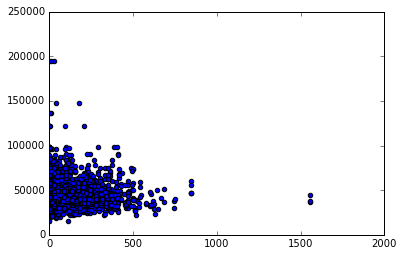

In [12]:
plt.scatter(data_check['AVG_PRCP'], data_check['PERCAPITA_INCOME'])
plt.xlim(0)

In [146]:
data_check.groupby(by = ['FEMA_DECLARED']).mean()

,% Minority,% Non-Hispanic White,% Rural,% Severe Housing Problems,AVG_PRCP,AVG_SNOW,AVG_TEMP,AVG_TEMP_EVENT,BEGIN_YEARMONTH,CZ_FIPS,...,EVENT_TYPE_Dust Devil,EVENT_TYPE_Flash Flood,EVENT_TYPE_Flood,EVENT_TYPE_Funnel Cloud,EVENT_TYPE_Hail,EVENT_TYPE_Heavy Rain,EVENT_TYPE_High Wind,EVENT_TYPE_Lightning,EVENT_TYPE_Thunderstorm Wind,EVENT_TYPE_Tornado
FEMA_DECLARED,,,,,,,,,,,,,,,,,,,,,
0,22.582829,77.417174,53.042796,14.244686,42.453134,0.290792,69.722336,69.722336,201355.093568,94.660054,...,0.000472,0.115966,0.073296,0.013620,0.268619,0.043458,0.000079,0.019761,0.431153,0.031019
1,14.762745,85.237255,57.994831,12.524064,97.118712,0.256790,66.531408,66.531408,201349.053476,145.882353,...,0.000000,0.194296,0.222816,0.003565,0.176471,0.078431,0.000000,0.005348,0.267380,0.049911


In [424]:
#checking out the outlier for avg prcp, and research shows that there was a heavy storm with around that amt of precipitation
data_check[data_check['AVG_PRCP'] > 1000][['CZ_NAME', 'STATE', 'EPISODE_ID', 'BEGIN_YEARMONTH', 'PERCAPITA_INCOME', '% Severe Housing Problems', '% Minority', 'FEMA_DECLARED', 'AVG_PRCP', 'coop_id']]

,CZ_NAME,STATE,EPISODE_ID,BEGIN_YEARMONTH,PERCAPITA_INCOME,% Severe Housing Problems,% Minority,FEMA_DECLARED,AVG_PRCP,coop_id
2909,ESCAMBIA,FL,85150,201404,36632.0,19,34.5,0,1555.0,86997.0
3256,OKALOOSA,FL,85150,201404,44695.0,18,25.3,0,1555.0,86997.0
3367,SANTA ROSA,FL,85150,201404,37610.0,14,17.2,1,1555.0,86997.0


In [256]:
data_check['AVG_PRCP'].describe()

count    25962.000000
mean        43.459595
std         81.750427
min          0.000000
25%          0.000000
50%          5.000000
75%         52.000000
max        987.000000
Name: AVG_PRCP, dtype: float64

In [195]:
data_fema = data_check[data_check['FEMA_DECLARED'] == 1]
data_norm = data_check[data_check['FEMA_DECLARED'] == 0]

/Users/meghajain/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


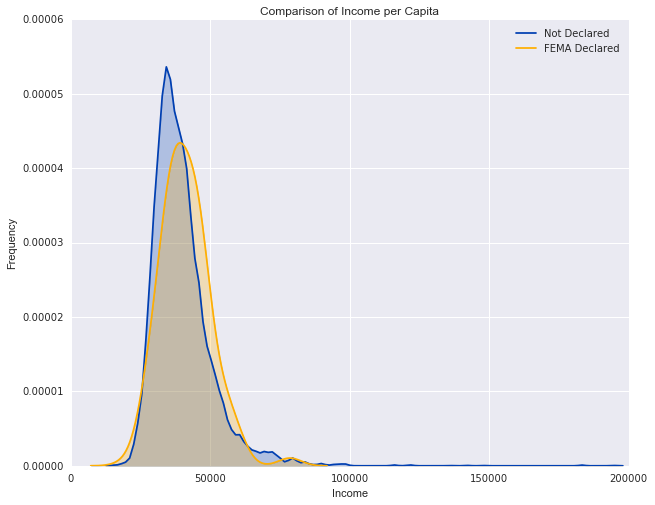

In [350]:
fig, ax = plt.subplots(1)
sns.kdeplot(data_norm['PERCAPITA_INCOME'], shade= True, color = '#003FB2', ax = ax, label = 'Not Declared')
sns.kdeplot(data_fema['PERCAPITA_INCOME'], shade = True, color = '#FFAF02', bw = 4000, ax = ax, label = 'FEMA Declared')
ax.set_title("Comparison of Income per Capita")
ax.set_xlabel("Income")
ax.set_ylabel("Frequency")
fig.set_size_inches(10, 8);

/Users/meghajain/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


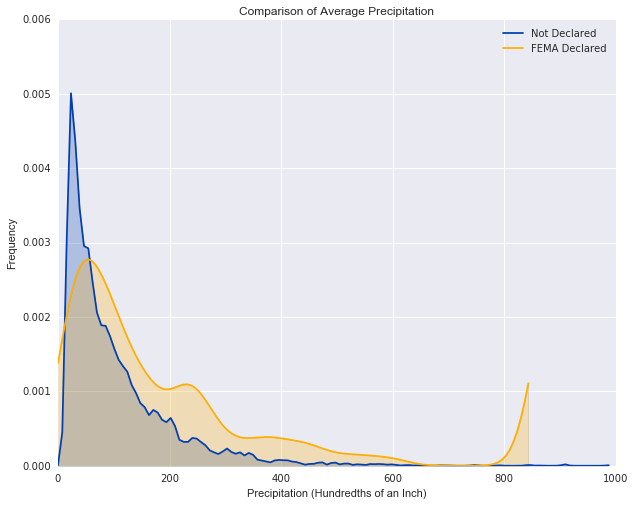

In [358]:
fig, ax1 = plt.subplots(1)

sns.kdeplot(data_norm['AVG_PRCP'], shade= True, color = '#003FB2', ax = ax1, label = 'Not Declared', cut = 0)
sns.kdeplot(data_fema['AVG_PRCP'], shade = True, color = '#FFAF02', ax = ax1, label = 'FEMA Declared', cut = 0)
ax1.set_title("Comparison of Average Precipitation")
ax1.set_xlabel("Precipitation (Hundredths of an Inch)")
ax1.set_ylabel("Frequency")
fig.set_size_inches(10, 8);

/Users/meghajain/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


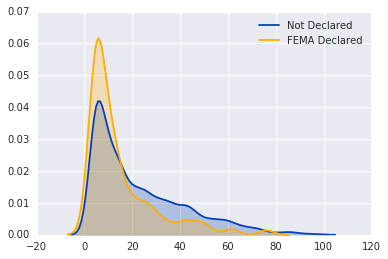

In [354]:
fig, ax2 = plt.subplots(1)

sns.kdeplot(data_norm['% Minority'], shade= True, color = '#003FB2', ax = ax2, label = 'Not Declared', cut = 3);
sns.kdeplot(data_fema['% Minority'], shade = True, color = '#FFAF02', ax = ax2, label = 'FEMA Declared', cut = 3);

(0, 200000)

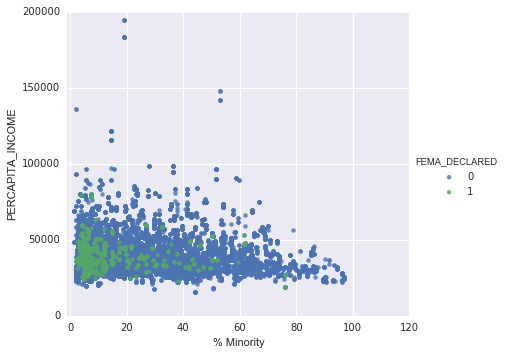

In [255]:
lm = sns.lmplot('% Minority', 'PERCAPITA_INCOME', data = data_check, hue = 'FEMA_DECLARED', fit_reg = False, aspect = 1.2)
axes = lm.axes
axes[0,0].set_xlim(-1,)
axes[0,0].set_ylim(0,200000)

(-50, 2000)

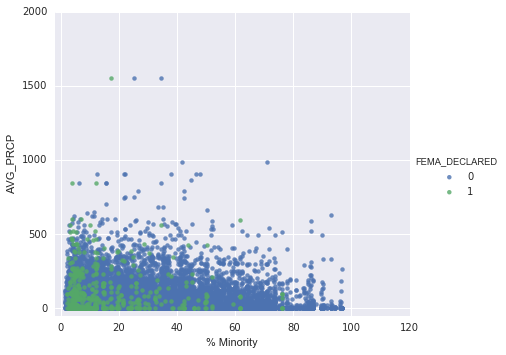

In [301]:
lm = sns.lmplot('% Minority', 'AVG_PRCP', data = data_concat, hue = 'FEMA_DECLARED',aspect = 1.2, fit_reg = False)
axes = lm.axes
axes[0,0].set_xlim(-2,)
axes[0,0].set_ylim(-50,2000)

## Models

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import sklearn
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def pr_curve(truthvec, scorevec, digit_prec=2):
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    return (recallvec, precisionvec, threshvec)

def log_lik_binary(truthvec, probvec):
    return np.sum((np.log(probvec)*truthvec) + (np.log(1-probvec)*(1-truthvec)))

In [58]:
data_full = data_check[['PERCAPITA_INCOME', 'DEATHS_DIRECT', 'EVENT_TYPE_Thunderstorm Wind', 'AVG_PRCP', 'DURATION', 'INJURIES_DIRECT', '% Minority', '% Rural', 'AVG_TEMP_EVENT','AVG_SNOW', 'EVENT_TYPE_Tornado', 'EVENT_TYPE_Flash Flood', 'EVENT_TYPE_Flood', 'FEMA_DECLARED']]
data_shuffled = data_full.iloc[np.random.permutation(len(data_full))].reset_index()

In [26]:
data_shuffled.drop(labels = ['index'], axis = 1, inplace = True)

In [27]:
data_disasters = data_shuffled[data_shuffled['FEMA_DECLARED'] == 1]
data_normal = data_shuffled[data_shuffled['FEMA_DECLARED'] == 0]

In [28]:
data_normal_test = data_normal.sample(1150)

In [29]:
data_normal_train = data_normal.sample(1150)

In [112]:
#training data
model_data_train = pd.concat([data_disasters, data_normal_train], ignore_index = True)

model_data_train_x = model_data_train[['PERCAPITA_INCOME', 'DEATHS_DIRECT', 'EVENT_TYPE_Thunderstorm Wind', 'AVG_PRCP', 'DURATION', 'INJURIES_DIRECT', '% Minority', '% Rural', 'AVG_TEMP_EVENT','AVG_SNOW', 'EVENT_TYPE_Tornado', 'EVENT_TYPE_Flash Flood', 'EVENT_TYPE_Flood']]
model_data_train_y = model_data_train['FEMA_DECLARED']
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(model_data_train_x, model_data_train_y, test_size = 0.3, random_state = 4444)

#Variables removed: 'INJURIES_INDIRECT','DEATHS_INDIRECT', 

In [113]:
#testing data
model_data_test = pd.concat([data_disasters, data_normal_test], ignore_index = True)

model_data_test_x = model_data_test[['PERCAPITA_INCOME', 'DEATHS_DIRECT', 'EVENT_TYPE_Thunderstorm Wind', 'AVG_PRCP', 'DURATION', 'INJURIES_DIRECT', '% Minority', '% Rural', 'AVG_TEMP_EVENT','AVG_SNOW', 'EVENT_TYPE_Tornado', 'EVENT_TYPE_Flash Flood', 'EVENT_TYPE_Flood']]
model_data_test_y = model_data_test['FEMA_DECLARED']

## Logistic Regression

In [114]:
model_lr = LogisticRegression()

In [115]:
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
model_lr.score(X_test, y_test)

0.70622568093385218

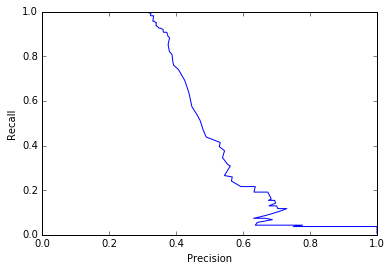

In [117]:
lr_pred_mat = model_lr.predict_proba(X_test)
lr_pred_vec = lr_pred_mat[:,1]
lr_pr=pr_curve(y_test,lr_pred_vec);

In [118]:
roc_auc_score(y_test,lr_pred_vec)

0.68288790684624012

In [119]:
recall_score(y_test, model_lr.predict(X_test))

0.21604938271604937

# Random Forest Classifier

In [120]:
model_rf = sklearn.ensemble.RandomForestClassifier(max_depth = 3)

In [121]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
model_rf.score(X_test, y_test)

0.7334630350194552

In [123]:
X_train.columns, model_rf.feature_importances_

(Index(['PERCAPITA_INCOME', 'DEATHS_DIRECT', 'EVENT_TYPE_Thunderstorm Wind',
        'AVG_PRCP', 'DURATION', 'INJURIES_DIRECT', '% Minority', '% Rural',
        'AVG_TEMP_EVENT', 'AVG_SNOW', 'EVENT_TYPE_Tornado',
        'EVENT_TYPE_Flash Flood', 'EVENT_TYPE_Flood'],
       dtype='object'),
 array([ 0.03390583,  0.00293127,  0.        ,  0.11561452,  0.22677039,
         0.        ,  0.32647169,  0.02114106,  0.14459707,  0.00348131,
         0.00891968,  0.0181989 ,  0.09796828]))

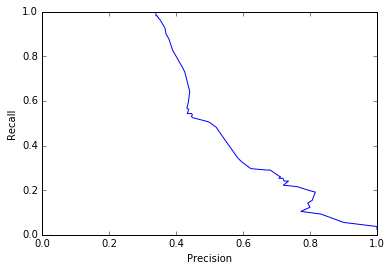

In [124]:
rf_pred_mat = model_rf.predict_proba(X_test)
rf_pred_vec = rf_pred_mat[:,1]
rf_pr=pr_curve(y_test,rf_pred_vec);

In [125]:
roc_auc_score(y_test,rf_pred_vec)

0.70534336419753085

In [126]:
recall_score(y_test, model_rf.predict(X_test))

0.25925925925925924

## Gradient Boosted Trees

### Finding best parameters for GBC using gridsearch

In [137]:
gbc = GradientBoostingClassifier(max_features= 'sqrt' ,n_estimators=50) 

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid)
CV_gbc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [100, 200, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [138]:
CV_gbc.best_params_

{'max_features': 'auto', 'n_estimators': 500}

In [139]:
CV_gbc.best_score_

0.78947368421052633

In [140]:
CV_gbc.score(X_test, y_test)

0.8132295719844358

In [127]:
model_gb = sklearn.ensemble.GradientBoostingClassifier(max_depth = 3, n_estimators = 500, max_features = 'auto')

In [128]:
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features='auto', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [129]:
model_gb.score(X_train, y_train)

0.99164578111946533

In [130]:
model_gb.score(X_test, y_test)

0.8132295719844358

In [131]:
X_train.columns

Index(['PERCAPITA_INCOME', 'DEATHS_DIRECT', 'EVENT_TYPE_Thunderstorm Wind',
       'AVG_PRCP', 'DURATION', 'INJURIES_DIRECT', '% Minority', '% Rural',
       'AVG_TEMP_EVENT', 'AVG_SNOW', 'EVENT_TYPE_Tornado',
       'EVENT_TYPE_Flash Flood', 'EVENT_TYPE_Flood'],
      dtype='object')

In [132]:
model_gb.feature_importances_

array([ 0.26684928,  0.00860472,  0.02008751,  0.09660821,  0.03219131,
        0.01123871,  0.17056155,  0.18514304,  0.15525536,  0.02922897,
        0.00808606,  0.00805016,  0.00809512])

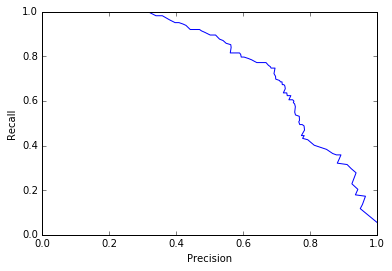

In [133]:
gb_pred_mat = model_gb.predict_proba(X_test)
gb_pred_vec = gb_pred_mat[:,1]
gb_pr=pr_curve(y_test,gb_pred_vec);

In [134]:
roc_auc_score(y_test,gb_pred_vec)

0.8555169753086419

In [135]:
recall_score(y_test, model_gb.predict(X_test))

0.6728395061728395

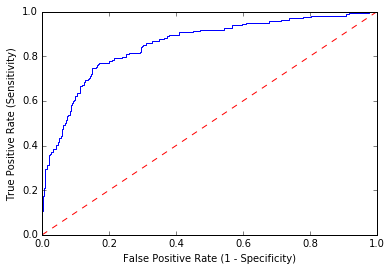

In [136]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test,gb_pred_vec)
plt.plot(fpr, tpr);
plt.plot(fpr,fpr, 'r--');
plt.xlabel("False Positive Rate (1 - Specificity)");
plt.ylabel("True Positive Rate (Sensitivity)");

## Test on holdout data.

In [141]:
CV_gbc.score(model_data_test_x, model_data_test_y)

0.87083576855639977

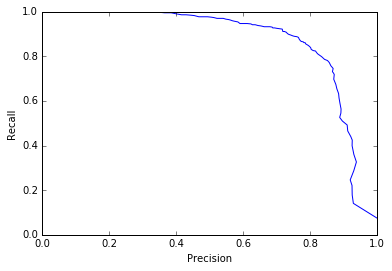

In [142]:
gb_pred_mat_final = model_gb.predict_proba(model_data_test_x)
gb_pred_vec_final = gb_pred_mat_final[:,1]
gb_pr_final = pr_curve(model_data_test_y,gb_pred_vec_final);

In [380]:
from sklearn.metrics import precision_recall_curve

In [381]:
precision, recall, thresholds = precision_recall_curve(model_data_test_y, gb_pred_vec_final)

In [382]:
thresholds = np.append(thresholds, 1)

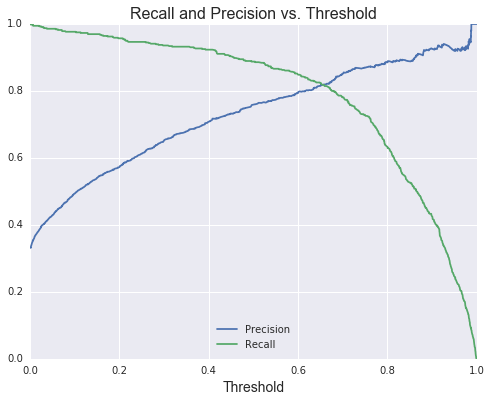

In [423]:
fig, ax = plt.subplots()

ax.plot(thresholds, precision, color = sns.color_palette()[0], label = "Precision")
ax.plot(thresholds, recall, color = sns.color_palette()[1], label = "Recall")
ax.legend(loc = "lower center")
ax.set_xlabel('Threshold', fontdict = {"fontsize": 14})
ax.set_title('Recall and Precision vs. Threshold', fontdict = {"fontsize": 16})
fig.set_size_inches(8,6);

In [143]:
roc_auc_score(model_data_test_y,gb_pred_vec_final)

0.93336975897078189

In [144]:
recall_score(model_data_test_y, model_gb.predict(model_data_test_x))

0.88770053475935828

## Comparing different models

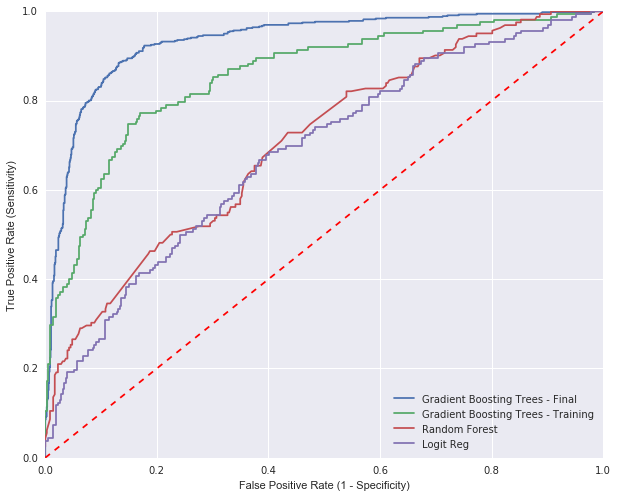

In [377]:
fpr_final, tpr_final, thresholds_final = sklearn.metrics.roc_curve(model_data_test_y,gb_pred_vec_final)
plt.plot(fpr_final, tpr_final, label = 'Gradient Boosting Trees - Final');
plt.plot(fpr_final,fpr_final, 'r--');
plt.xlabel("False Positive Rate (1 - Specificity)");
plt.ylabel("True Positive Rate (Sensitivity)");

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test,gb_pred_vec)
plt.plot(fpr, tpr, label = 'Gradient Boosting Trees - Training');
# plt.plot(fpr,fpr, 'r--');
plt.xlabel("False Positive Rate (1 - Specificity)");
plt.ylabel("True Positive Rate (Sensitivity)");

fpr_rf, tpr_rf, thresholds_rf = sklearn.metrics.roc_curve(y_test,rf_pred_vec)
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest');
# plt.plot(fpr_rf,fpr_rf, 'r--');
plt.xlabel("False Positive Rate (1 - Specificity)");
plt.ylabel("True Positive Rate (Sensitivity)");


fpr_lr, tpr_lr, thresholds_lr = sklearn.metrics.roc_curve(y_test,lr_pred_vec)
plt.plot(fpr_lr, tpr_lr, label = 'Logit Reg');
# plt.plot(fpr_rf,fpr_rf, 'r--');
plt.xlabel("False Positive Rate (1 - Specificity)");
plt.ylabel("True Positive Rate (Sensitivity)");


plt.legend(loc = 'lower right')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size;

## Exploring events that crossed counties, but only 1 county was declared a disaster

In [312]:
data_check_grouped = data_check.groupby(by = ['EPISODE_ID'])

In [315]:
df_diff = pd.DataFrame({'Values': data_check_grouped['FEMA_DECLARED'].value_counts()}).reset_index()

In [320]:
episodes = []
for episode in df_diff[df_diff['EPISODE_ID'].duplicated()]['EPISODE_ID']:
    episodes.append(episode)

In [324]:
data_withdiff = data_check[data_check['EPISODE_ID'].isin(episodes)]

In [333]:
episodes[:10]

[71117, 71923, 71939, 72120, 72710, 72714, 72715, 72722, 72857, 72890]

In [492]:
data_withdiff[data_withdiff['EPISODE_ID'] == 72710][['CZ_NAME', 'STATE']]

,CZ_NAME,STATE
46134,WHITESIDE,IL
46265,HENRY,IL


In [449]:
data_withdiff.groupby(by = ['EPISODE_ID', 'FEMA_DECLARED'])[['PERCAPITA_INCOME', '% Minority']].mean()

PERCAPITA_INCOME  % Minority
EPISODE_ID FEMA_DECLARED                              
71117      0                  38279.615385   32.161538
           1                  37345.000000   21.700000
71923      0                  46380.636364    9.809091
           1                  42192.500000    4.350000
71939      0                  47660.727273   10.909091
           1                  37408.000000    3.800000
72120      0                  41177.764706    8.741176
           1                  38519.857143    5.700000
72710      0                  42494.000000    9.000000
           1                  39040.000000   15.100000
72714      0                  44152.500000    7.400000
           1                  41364.200000   12.820000
72715      0                  41586.000000    5.550000
           1                  37993.750000   11.425000
72722      0                  45510.727273   24.681818
           1                  42463.250000   19.150000
72857      0                  45625.125000   17.937500
           1                  49322.000000   42.300000
72890      0                  48416.333333    6.266667
           1                  47705.000000   12.300000
72937      0                  54126.000000    4.900000
           1                  37722.000000    6.250000
72957      0                  47127.333333    4.866667
           1                  38985.000000    5.000000
72967      0                  45622.400000    7.626667
           1                  39625.000000   11.600000
72997      0                  47245.000000    9.771429
           1                  36894.500000   20.300000
73021      0                  31543.538462   18.115385
           1                  27022.000000    6.400000
...                                    ...         ...
86996      0                  49666.000000   11.500000
           1                  46689.500000   14.900000
87169      0                  44340.000000    6.150000
           1                  43077.000000    4.800000
87216      0                  55608.500000    6.250000
           1                  56024.000000   14.800000
87344      0                  28963.500000   28.750000
           1                  27774.000000    9.900000
87357      0                  45943.000000   12.000000
           1                  38410.000000   40.250000
88005      0                  77611.833333   12.433333
           1                  56024.000000   14.800000
88022      0                  29240.500000    5.825000
           1                  32506.000000    2.700000
89158      0                  36040.000000   14.500000
           1                  41614.000000   14.600000
89481      0                  47405.000000    2.700000
           1                  41614.000000   14.600000
89490      0                  44125.500000   24.100000
           1                  36844.000000   50.000000
89491      0                  36308.250000   21.550000
           1                  48301.500000   38.350000
89594      0                  35793.000000    8.775000
           1                  36844.000000   50.000000
89598      0                  41491.000000   17.840000
           1                  48301.500000   38.350000
90329      0                  45662.000000   12.100000
           1                  39963.500000    5.500000
90554      0                  37871.142857    6.300000
           1                  34311.666667    5.800000

[484 rows x 2 columns]

In [454]:
df_grouped_diff = pd.DataFrame({'MED_INCOME': data_withdiff.groupby(by = ['EPISODE_ID', 'FEMA_DECLARED'])['PERCAPITA_INCOME'].median(), 'MED_DIV': data_withdiff.groupby(by = ['EPISODE_ID', 'FEMA_DECLARED'])['% Minority'].median()}).reset_index()

In [483]:
df_grouped_diffshuffle = df_grouped_diff.iloc[np.random.permutation(len(df_grouped_diff))].reset_index()

In [455]:
df_grouped_diff[:10].plot()

,EPISODE_ID,FEMA_DECLARED,MED_DIV,MED_INCOME
0,71117,0,33.60,37626.0
1,71117,1,21.70,37345.0
2,71923,0,5.90,46830.0
3,71923,1,4.35,42192.5
4,71939,0,8.40,47705.0
5,71939,1,3.80,37408.0
6,72120,0,5.70,41904.0
7,72120,1,4.80,37408.0
8,72710,0,9.00,42494.0
9,72710,1,15.10,39040.0


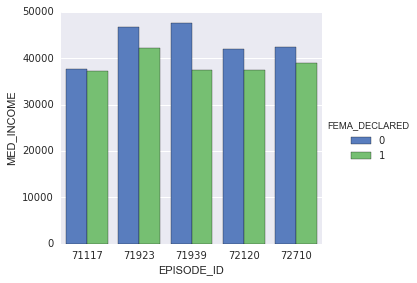

In [487]:

sns.factorplot(x="EPISODE_ID", y="MED_INCOME", hue="FEMA_DECLARED", data= df_grouped_diff[:10],
                   size=4, aspect = 1.2, kind="bar", palette="muted")

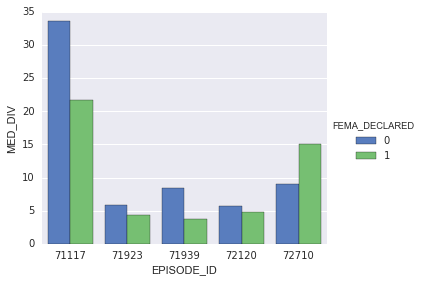

In [486]:
sns.factorplot(x="EPISODE_ID", y="MED_DIV", hue="FEMA_DECLARED", data= df_grouped_diff[:10],
                   size=4, aspect = 1.2, kind="bar", palette="muted")

In [482]:
df_grouped_diff['MED_DIV'].max()

76.0

In [325]:
data_withdiff_fema = data_withdiff[data_withdiff['FEMA_DECLARED'] == 1]
data_withdiff_norm = data_withdiff[data_withdiff['FEMA_DECLARED'] == 0]

In [434]:
data_withdiff_fema[data_withdiff_fema['EPISODE_ID'] == 85150]['PERCAPITA_INCOME'].median(), data_withdiff_norm[data_withdiff_norm['EPISODE_ID'] == 71117]['PERCAPITA_INCOME'].median(),

(37610.0, 37626.0)

In [435]:
data_withdiff_fema[data_withdiff_fema['EPISODE_ID'] == 85150]['% Minority'].median(), data_withdiff_norm[data_withdiff_norm['EPISODE_ID'] == 85150]['% Minority'].median()

(17.2, 29.9)

In [436]:
data_withdiff_fema[data_withdiff_fema['EPISODE_ID'] == 71923]['% Minority'].median(), data_withdiff_norm[data_withdiff_norm['EPISODE_ID'] == 71923]['% Minority'].median()

(4.35, 5.9)

In [437]:
data_withdiff_fema[data_withdiff_fema['EPISODE_ID'] == 71923]['PERCAPITA_INCOME'].median(), data_withdiff_norm[data_withdiff_norm['EPISODE_ID'] == 71923]['PERCAPITA_INCOME'].median()

(42192.5, 46830.0)

In [438]:
data_withdiff_fema[data_withdiff_fema['EPISODE_ID'] == 71939]['% Minority'].median(), data_withdiff_norm[data_withdiff_norm['EPISODE_ID'] == 71939]['% Minority'].median()

(3.8, 8.4)

In [439]:
data_withdiff_fema[data_withdiff_fema['EPISODE_ID'] == 71939]['PERCAPITA_INCOME'].median(), data_withdiff_norm[data_withdiff_norm['EPISODE_ID'] == 71939]['PERCAPITA_INCOME'].median()

(37408.0, 47705.0)

In [441]:
data_withdiff_norm[data_withdiff_norm['EPISODE_ID'] == 71939]['PERCAPITA_INCOME']

41593    51715.0
41688    55442.0
41689    48115.0
41810    48682.0
41925    47031.0
41933    51183.0
41981    40165.0
42041    44806.0
42049    42728.0
42164    46696.0
42376    47705.0
Name: PERCAPITA_INCOME, dtype: float64